In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('heart_eda.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [86]:
X = df.drop(labels='target', axis=1)
y = df['target']

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import *

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.165, random_state=101)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 253, X_test size: 50
y_train size: 253, y_test size: 50


In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
train_model = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = train_model.predict(X_test_scaled)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9

In [129]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.90      0.93      0.91        28

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



In [130]:
final_model = train_model.fit(X,y)
y_hat = final_model.predict(X)
accuracy_score(y_true=y, y_pred=y_hat)

0.8712871287128713

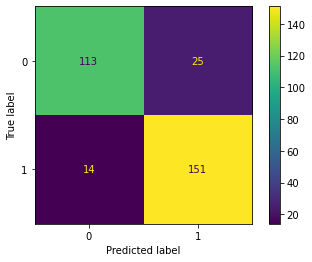

In [131]:
plot_confusion_matrix(
    estimator=final_model,
    X=X,
    y_true=y
);